# Librerias

In [1]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict
from sklearn.metrics import (roc_auc_score, f1_score, 
                             cohen_kappa_score, accuracy_score, 
                             balanced_accuracy_score, recall_score, 
                             precision_score, balanced_accuracy_score, 
                             make_scorer, matthews_corrcoef)

from sklearn.feature_selection import VarianceThreshold, SelectFromModel

from sklearn.metrics import confusion_matrix, check_scoring

from sklearn.preprocessing import LabelEncoder

from mlxtend.evaluate import ftest, mcnemar, mcnemar_tables, mcnemar_table
from statsmodels.stats.multitest import multipletests

# Datos

In [2]:
pre_path = "../../../../data/radiomic_data/"

In [3]:
data_path = pre_path + "concatenated_data/" + "features_all_gland.csv"

In [4]:
df = pd.read_csv(data_path)
df['patient_id_study_id'] = df['patient_id'].astype(str) + '_' + df['study_id'].astype(str)
df = df.set_index('patient_id_study_id')

In [5]:
df.head()

,patient_id,study_id,label,adc_original_shape_Elongation,adc_original_shape_Flatness,adc_original_shape_LeastAxisLength,adc_original_shape_MajorAxisLength,adc_original_shape_Maximum2DDiameterColumn,adc_original_shape_Maximum2DDiameterRow,adc_original_shape_Maximum2DDiameterSlice,...,t2_exponential_gldm_GrayLevelNonUniformity,t2_exponential_gldm_GrayLevelVariance,t2_exponential_gldm_HighGrayLevelEmphasis,t2_exponential_gldm_LargeDependenceEmphasis,t2_exponential_gldm_LargeDependenceHighGrayLevelEmphasis,t2_exponential_gldm_LargeDependenceLowGrayLevelEmphasis,t2_exponential_gldm_LowGrayLevelEmphasis,t2_exponential_gldm_SmallDependenceEmphasis,t2_exponential_gldm_SmallDependenceHighGrayLevelEmphasis,t2_exponential_gldm_SmallDependenceLowGrayLevelEmphasis
patient_id_study_id,,,,,,,,,,,,,,,,,,,,,
10000_1000000,10000,1000000,0,0.808087,0.633421,29.132328,45.992060,52.023421,45.423126,52.050928,...,60127.673168,0.028000,1.048730,78.122638,78.918905,78.030621,0.995408,0.013927,0.020408,0.013329
10001_1000001,10001,1000001,0,0.862442,0.764552,44.203477,57.816184,64.509395,64.791501,63.803018,...,139894.070996,0.000528,1.001557,79.162458,79.205704,79.151655,0.999619,0.013044,0.013234,0.013005
10002_1000002,10002,1000002,0,0.980027,0.814579,40.404389,49.601552,55.095586,57.791057,56.759056,...,117629.356071,0.145071,1.272186,76.342860,83.702612,74.954786,0.964784,0.016139,0.076518,0.013551
10003_1000003,10003,1000003,0,0.938419,0.817366,41.656787,50.964656,53.287394,60.950602,56.607416,...,131838.351632,0.028115,1.063863,77.948506,79.663506,77.574429,0.988749,0.014376,0.025824,0.013307
10004_1000004,10004,1000004,0,0.852145,0.637281,34.380191,53.948227,60.310477,57.723667,60.055545,...,94406.183813,0.010063,1.018443,78.676255,78.972203,78.623897,0.997771,0.013463,0.018503,0.013148


# Split data

In [6]:
from sklearn.model_selection import StratifiedGroupKFold

y = df["label"]
groups = df.patient_id
X = df[[col for col in df.columns 
        if col not in ['patient_id', 'study_id', 'label']]]

In [7]:
random_state_value = 1

print_information = False

sgkf = StratifiedGroupKFold(n_splits=4, shuffle=True, random_state=random_state_value)
sgkf.split(X, y, groups)
train_index, test_index = next(sgkf.split(X, y, groups))
if print_information:
    print(f"  Train: index={train_index}")
    print(f"         size={len(train_index)}")
    print(f"         group={groups[train_index]}")
    print(f"  Test:  index={test_index}")
    print(f"         size={len(test_index)}")
    print(f"         group={groups[test_index]}")

X_train = X.iloc[train_index]
Y_train = y.iloc[train_index]

X_test = X.iloc[test_index]
Y_test = y.iloc[test_index]

le = LabelEncoder()
y_train = le.fit_transform(Y_train)
y_test = le.transform(Y_test)

display(X_train)
display(Y_train)
display(y_train)

,adc_original_shape_Elongation,adc_original_shape_Flatness,adc_original_shape_LeastAxisLength,adc_original_shape_MajorAxisLength,adc_original_shape_Maximum2DDiameterColumn,adc_original_shape_Maximum2DDiameterRow,adc_original_shape_Maximum2DDiameterSlice,adc_original_shape_Maximum3DDiameter,adc_original_shape_MeshVolume,adc_original_shape_MinorAxisLength,...,t2_exponential_gldm_GrayLevelNonUniformity,t2_exponential_gldm_GrayLevelVariance,t2_exponential_gldm_HighGrayLevelEmphasis,t2_exponential_gldm_LargeDependenceEmphasis,t2_exponential_gldm_LargeDependenceHighGrayLevelEmphasis,t2_exponential_gldm_LargeDependenceLowGrayLevelEmphasis,t2_exponential_gldm_LowGrayLevelEmphasis,t2_exponential_gldm_SmallDependenceEmphasis,t2_exponential_gldm_SmallDependenceHighGrayLevelEmphasis,t2_exponential_gldm_SmallDependenceLowGrayLevelEmphasis
patient_id_study_id,,,,,,,,,,,,,,,,,,,,,
10000_1000000,0.808087,0.633421,29.132328,45.992060,52.023421,45.423126,52.050928,52.155433,34596.941996,37.165588,...,60127.673168,0.028000,1.048730,78.122638,78.918905,78.030621,0.995408,0.013927,0.020408,0.013329
10001_1000001,0.862442,0.764552,44.203477,57.816184,64.509395,64.791501,63.803018,68.505758,90203.160327,49.863125,...,139894.070996,0.000528,1.001557,79.162458,79.205704,79.151655,0.999619,0.013044,0.013234,0.013005
10002_1000002,0.980027,0.814579,40.404389,49.601552,55.095586,57.791057,56.759056,59.664486,68950.891538,48.610866,...,117629.356071,0.145071,1.272186,76.342860,83.702612,74.954786,0.964784,0.016139,0.076518,0.013551
10004_1000004,0.852145,0.637281,34.380191,53.948227,60.310477,57.723667,60.055545,60.764832,60276.919709,45.971733,...,94406.183813,0.010063,1.018443,78.676255,78.972203,78.623897,0.997771,0.013463,0.018503,0.013148
10005_1000005,0.825865,0.776633,39.323145,50.632868,59.411393,49.641503,59.797364,59.872571,57488.371713,41.815928,...,104790.355440,0.007254,1.021922,78.389992,79.295271,78.163672,0.994520,0.013481,0.014627,0.013194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11470_1001494,0.852054,0.760275,32.752101,43.079278,50.721704,46.239147,50.372505,51.973274,35425.043292,36.705853,...,67173.922105,0.070730,1.113226,77.695537,79.282519,77.471623,0.990791,0.014786,0.044466,0.013394
11471_1001495,0.878505,0.737381,36.317429,49.251941,56.065829,52.513226,58.636140,58.740505,51458.060433,43.268071,...,82269.382031,0.005180,1.014790,78.475659,79.026015,78.340754,0.996524,0.013452,0.014564,0.013223
11472_1001496,0.751721,0.595717,28.649831,48.093019,52.415516,41.672912,52.445758,52.937676,34920.562320,36.152529,...,52674.778513,0.028067,1.067314,77.201261,79.194182,76.809612,0.987631,0.014327,0.019965,0.013452


patient_id_study_id
10000_1000000    0
10001_1000001    0
10002_1000002    0
10004_1000004    0
10005_1000005    1
                ..
11470_1001494    0
11471_1001495    1
11472_1001496    1
11473_1001497    0
11475_1001499    1
Name: label, Length: 1125, dtype: int64

array([0, 0, 0, ..., 1, 0, 1])

# Selection of optimization metrics

## Select optimization metric

In [8]:
optimization_metric = "AUC" #@param ["AUC", "MCC", "Kappa","F1", "Accuracy", "Sensitivity", "Specificity", "PPV", "NPV", "BalancedAcc"]

if optimization_metric == "AUC":
    score_str = 'roc_auc'
elif optimization_metric == "MCC":
    score_str = make_scorer(matthews_corrcoef)
elif optimization_metric == "Kappa":
    score_str = make_scorer(cohen_kappa_score)
elif optimization_metric == "F1":
    score_str = 'f1'
elif optimization_metric == "Accuracy":
    score_str = 'accuracy'
elif optimization_metric == "Sensitivity":
    score_str = 'recall'
elif optimization_metric == "Specificity":
    score_str = make_scorer(recall_score, pos_label=0)
elif optimization_metric == "PPV":
    score_str = 'precision'
elif optimization_metric == "NPV":
    score_str = make_scorer(precision_score, pos_label=0)
elif optimization_metric == "BalancedAcc":
    score_str = 'balanced_accuracy'

score_group = {'AUC': 'roc_auc', 'MCC': make_scorer(matthews_corrcoef) ,
               'Kappa': make_scorer(cohen_kappa_score), 
               'F1': 'f1', 'Accuracy': 'accuracy', 
               'Sensitivity': 'recall', 
               'Specificity': make_scorer(recall_score, pos_label=0),
               'PPV': 'precision', 
               'NPV': make_scorer(precision_score, pos_label=0),
               'BalancedAcc': 'balanced_accuracy'}

score_refit_str = optimization_metric

## Classifier Selection

In [9]:
SVM_classifier = False
LogisticRegression_classifier = True
RandomForest_classifier = True
NaiveBayes_classifier = True
KNN_classifier = False
GradientBoosting_classifier = False

## Run and Compare Classifiers

In [10]:
def cross_val_all_scores(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    params=None,
    pre_dispatch="2*n_jobs",
    error_score=np.nan,
):
    
    scorer = check_scoring(estimator, scoring=scoring)

    cv_results = cross_validate(
        estimator=estimator,
        X=X,
        y=y,
        groups=groups,
        scoring={"score": scorer},
        cv=cv,
        n_jobs=n_jobs,
        verbose=verbose,
        fit_params=fit_params,
        params=params,
        pre_dispatch=pre_dispatch,
        error_score=error_score,
    )
    return cv_results["test_score"]

In [11]:
df_ncv_scores = pd.DataFrame(columns = ['Classifier', 'Nested-CV Mean', 'Nested-CV Std'])
df_ncv_preds = pd.DataFrame(columns = ['Classifier', 'Preds', 'GT'])

if SVM_classifier:
    pipe_svc = make_pipeline(StandardScaler(),
                             VarianceThreshold(),
                             SVC(random_state=random_state_value, class_weight="balanced"))

    param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    param_grid_svc = [{'svc__C': param_range, 
                  'svc__kernel': ['linear']},
                  {'svc__C': param_range, 
                  'svc__gamma': param_range, 
                  'svc__kernel': ['rbf']}]

    gs_svc = GridSearchCV(estimator=pipe_svc, 
                      param_grid=param_grid_svc, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_scv = cross_val_score(gs_svc, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    preds_svc = cross_val_predict(gs_svc, X_train, y_train, 
                            cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['SVM'], 'Nested-CV Mean': [np.mean(scores_scv)], 'Nested-CV Std': [np.std(scores_scv)]}, columns = ['Classifier', 'Nested-CV Mean', 'Nested-CV Std'])
    df_ncv_scores = pd.concat([df_ncv_scores, df_score], ignore_index=True)

    df_pred = pd.DataFrame(data={'Classifier': ['SVM'], 'Preds': [preds_svc], 'GT': [y_train]}, columns = ['Classifier', 'Preds', 'GT'])
    df_ncv_preds = pd.concat([df_ncv_preds, df_pred], ignore_index=True)
    
if LogisticRegression_classifier:
    pipe_lr = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                            LogisticRegression(penalty='elasticnet', class_weight="balanced", 
                                               random_state=random_state_value,
                                               solver='saga'))

    param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    param_range_penalty = ['l1']

    param_grid_lr = {'logisticregression__penalty': param_range_penalty,
                     'logisticregression__C': param_range_lr,
                     }

    gs_lr = GridSearchCV(estimator=pipe_lr, 
                      param_grid=param_grid_lr, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_lr = cross_val_score(gs_lr, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    preds_lr = cross_val_predict(gs_lr, X_train, y_train, 
                            cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Logistic Regression'], 'Nested-CV Mean': [np.mean(scores_lr)], 'Nested-CV Std': [np.std(scores_lr)]})
    df_ncv_scores = pd.concat([df_ncv_scores, df_score], ignore_index=True)

    df_pred = pd.DataFrame(data={'Classifier': ['Logistic Regression'], 'Preds': [preds_lr], 'GT': [y_train]}, columns = ['Classifier', 'Preds', 'GT'])
    df_ncv_preds = pd.concat([df_ncv_preds, df_pred], ignore_index=True)

if RandomForest_classifier:
    pipe_rf = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                            RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", random_state=random_state_value))

    param_range_rf = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

    param_grid_rf = {'randomforestclassifier__n_estimators': param_range_rf,
                    'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

    gs_rf = GridSearchCV(estimator=pipe_rf, 
                      param_grid=param_grid_rf, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_rf = cross_val_score(gs_rf, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    preds_rf = cross_val_predict(gs_rf, X_train, y_train, 
                            cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Random Forest'], 'Nested-CV Mean': [np.mean(scores_rf)], 'Nested-CV Std': [np.std(scores_rf)]})
    df_ncv_scores = pd.concat([df_ncv_scores, df_score], ignore_index=True)

    df_pred = pd.DataFrame(data={'Classifier': ['Random Forest'], 'Preds': [preds_rf], 'GT': [y_train]}, columns = ['Classifier', 'Preds', 'GT'])
    df_ncv_preds = pd.concat([df_ncv_preds, df_pred], ignore_index=True)

if NaiveBayes_classifier:
    pipe_nb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                            GaussianNB())

    param_grid_nb = {}

    gs_nb = GridSearchCV(estimator=pipe_nb, 
                      param_grid=param_grid_nb, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_nb = cross_val_score(gs_nb, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    preds_nb = cross_val_predict(gs_nb, X_train, y_train, 
                            cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Naive Bayes'], 'Nested-CV Mean': [np.mean(scores_nb)], 'Nested-CV Std': [np.std(scores_nb)]})
    df_ncv_scores = pd.concat([df_ncv_scores, df_score], ignore_index=True)

    df_pred = pd.DataFrame(data={'Classifier': ['Naive Bayes'], 'Preds': [preds_nb], 'GT': [y_train]}, columns = ['Classifier', 'Preds', 'GT'])
    df_ncv_preds = pd.concat([df_ncv_preds, df_pred], ignore_index=True)

if KNN_classifier:
    pipe_knn = make_pipeline(StandardScaler(),
                             VarianceThreshold(),
                             KNeighborsClassifier(n_jobs=-1)) # random_state=random_state_value, 

    param_n_neighbors_knn = [2, 3, 4, 5, 6, 7, 8]

    param_grid_knn = {'kneighborsclassifier__n_neighbors': param_n_neighbors_knn,
                    'kneighborsclassifier__weights': ['uniform', 'distance']}

    gs_knn = GridSearchCV(estimator=pipe_knn, 
                      param_grid=param_grid_knn, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_knn = cross_val_score(gs_knn, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    preds_knn = cross_val_predict(gs_knn, X_train, y_train, 
                            cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['KNN'], 'Nested-CV Mean': [np.mean(scores_knn)], 'Nested-CV Std': [np.std(scores_knn)]})
    df_ncv_scores = pd.concat([df_ncv_scores, df_score], ignore_index=True)

    df_pred = pd.DataFrame(data={'Classifier': ['KNN'], 'Preds': [preds_knn], 'GT': [y_train]}, columns = ['Classifier', 'Preds', 'GT'])
    df_ncv_preds = pd.concat([df_ncv_preds, df_pred], ignore_index=True)

if GradientBoosting_classifier:
    pipe_gb = make_pipeline(StandardScaler(),
                            VarianceThreshold(),
                            GradientBoostingClassifier(random_state=random_state_value))

    param_range_gb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
    param_learnrate_gb = [0.0001, 0.001, 0.01, 0.1]

    param_grid_gb = {'gradientboostingclassifier__n_estimators': param_range_gb,
                    'gradientboostingclassifier__learning_rate': param_learnrate_gb}

    gs_gb = GridSearchCV(estimator=pipe_gb, 
                      param_grid=param_grid_gb, 
                      scoring=score_str, 
                      refit=True,
                      cv=2,
                      n_jobs=-1)

    scores_gb = cross_val_score(gs_gb, X_train, y_train, 
                            scoring=score_str, cv=5)
    
    preds_gb = cross_val_predict(gs_gb, X_train, y_train, 
                            cv=5)
    
    df_score = pd.DataFrame(data={'Classifier': ['Gradient Boosting'], 'Nested-CV Mean': [np.mean(scores_gb)], 'Nested-CV Std': [np.std(scores_gb)]})
    df_ncv_scores = pd.concat([df_ncv_scores, df_score], ignore_index=True)

    df_pred = pd.DataFrame(data={'Classifier': ['Gradient Boosting'], 'Preds': [preds_gb], 'GT': [y_train]}, columns = ['Classifier', 'Preds', 'GT'])
    df_ncv_preds = pd.concat([df_ncv_preds, df_pred], ignore_index=True)

df_ncv_scores.sort_values(by=df_ncv_scores.columns[1], ascending=False)

/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/jose/anaconda3/envs/tfg/lib/p

KeyboardInterrupt: 

## Assess if differences between models are statistically significant

In [ ]:
f, p_value_f = ftest(df_ncv_preds.loc[0,'GT'], df_ncv_preds.loc[0,'Preds'], df_ncv_preds.loc[1,'Preds'],df_ncv_preds.loc[2,'Preds'])
if p_value_f < 0.05:
    print("Found statistically significant differences between models being \ncompared assessed using F-test (p-value: ", round(p_value_f,4), ")")
    print("\nCompare individual models pairwise using the McNemar test \nand apply the multiple comparisons correction using Bonferroni")
    p_values_list = []

    cs_0vs1, pv_0vs1 = mcnemar(mcnemar_table(df_ncv_preds.loc[0,'GT'], df_ncv_preds.loc[0,'Preds'], df_ncv_preds.loc[1,'Preds']))
    cs_0vs2, pv_0vs2 = mcnemar(mcnemar_table(df_ncv_preds.loc[0,'GT'], df_ncv_preds.loc[0,'Preds'], df_ncv_preds.loc[2,'Preds']))
    cs_1vs2, pv_1vs2 = mcnemar(mcnemar_table(df_ncv_preds.loc[0,'GT'], df_ncv_preds.loc[1,'Preds'], df_ncv_preds.loc[2,'Preds']))

    p_values_list += [pv_0vs1, pv_0vs2, pv_1vs2]  
    reject, p_vals_corrected, _, _ = multipletests(p_values_list, method='bonferroni')
    print('\tRejected? ', reject)
    print('\tp-values corrected: ', p_vals_corrected)
else:
    print("Did not found statistically significant differences between models being \ncompared assessed using F-test (p-value: ", round(p_value_f,4), ")")

# Select classifier to train/fine-tune model

In [24]:
selected_model = 'LogisticRegression'

number_folds = 5

# Train/Fine-tune selected model

In [25]:
if selected_model == 'SVM':
  pipe_svc = make_pipeline(StandardScaler(),
                           VarianceThreshold(),
                           SVC(random_state=random_state_value))

  param_range = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

  param_grid_svc = [{'svc__C': param_range, 
                'svc__kernel': ['linear']},
                {'svc__C': param_range, 
                'svc__gamma': param_range, 
                'svc__kernel': ['rbf']}]

  gs_svc = GridSearchCV(estimator=pipe_svc, 
                    param_grid=param_grid_svc, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)

  gs = gs_svc.fit(X_train, y_train)
  clf_svc = gs.best_estimator_
          
elif selected_model == 'LogisticRegression':
  pipe_lr = make_pipeline(StandardScaler(),
                          VarianceThreshold(),
                          LogisticRegression(penalty='elasticnet', class_weight='balanced', 
                                             random_state=random_state_value,
                                             solver='saga'))

  param_range_lr = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

  param_range_penalty = ['l1']

  param_grid_lr = {'logisticregression__penalty': param_range_penalty,
                   'logisticregression__C': param_range_lr,
                   }

  gs_lr = GridSearchCV(estimator=pipe_lr, 
                    param_grid=param_grid_lr, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)

  gs = gs_lr.fit(X_train, y_train)
  clf_lr = gs.best_estimator_

elif selected_model == 'RandomForest':
  pipe_rf = make_pipeline(StandardScaler(),
                          VarianceThreshold(),
                          RandomForestClassifier(n_jobs=-1, class_weight="balanced_subsample", random_state=random_state_value))

  param_range_rf = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

  param_grid_rf = {'randomforestclassifier__n_estimators': param_range_rf,
                  'randomforestclassifier__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

  gs_rf = GridSearchCV(estimator=pipe_rf, 
                    param_grid=param_grid_rf, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_rf.fit(X_train, y_train)
  clf_rf = gs.best_estimator_

elif selected_model == 'NaiveBayes':
  pipe_nb = make_pipeline(StandardScaler(),
                          VarianceThreshold(),
                          GaussianNB())

  param_grid_nb = {}

  gs_nb = GridSearchCV(estimator=pipe_nb, 
                    param_grid=param_grid_nb, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_nb.fit(X_train, y_train)
  clf_nb = gs.best_estimator_
  
elif selected_model == 'KNN':
  pipe_knn = make_pipeline(StandardScaler(),
                           VarianceThreshold(),
                           KNeighborsClassifier(n_jobs=-1)) # random_state=random_state_value, 

  param_n_neighbors_knn = [2, 3, 4, 5, 6, 7, 8]

  param_grid_knn = {'kneighborsclassifier__n_neighbors': param_n_neighbors_knn,
                  'kneighborsclassifier__weights': ['uniform', 'distance']}

  gs_knn = GridSearchCV(estimator=pipe_knn, 
                    param_grid=param_grid_knn, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_knn.fit(X_train, y_train)
  clf_knn = gs.best_estimator_
  
elif selected_model == 'GradientBoosting':
  pipe_gb = make_pipeline(StandardScaler(),
                          VarianceThreshold(),
                          GradientBoostingClassifier(random_state=random_state_value))

  param_range_gb = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
  param_learnrate_gb = [0.0001, 0.001, 0.01, 0.1]

  param_grid_gb = {'gradientboostingclassifier__n_estimators': param_range_gb,
                  'gradientboostingclassifier__learning_rate': param_learnrate_gb}

  gs_gb = GridSearchCV(estimator=pipe_gb, 
                    param_grid=param_grid_gb, 
                    scoring=score_group, 
                    refit=score_refit_str,
                    cv=number_folds,
                    n_jobs=-1)
  gs = gs_gb.fit(X_train, y_train)
  clf_gb = gs.best_estimator_

print(gs.best_params_)
for key in score_group:
    if len(gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1])>1:
        print('CV %s: %.3f +/- %.3f' % (key,
                                        gs.cv_results_['mean_test_'+key][gs.cv_results_['rank_test_'+key]==1][0],
                                        gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1][0]))
    else:
        print('CV %s: %.3f +/- %.3f' % (key,
                                        gs.cv_results_['mean_test_'+key][gs.cv_results_['rank_test_'+key]==1],
                                        gs.cv_results_['std_test_'+key][gs.cv_results_['rank_test_'+key]==1]))

/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jose/anaconda

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1'}
CV AUC: 0.812 +/- 0.013
CV MCC: 0.468 +/- 0.026
CV Kappa: 0.448 +/- 0.021
CV F1: 0.631 +/- 0.017
CV Accuracy: 0.746 +/- 0.007
CV Sensitivity: 0.780 +/- 0.039
CV Specificity: 1.000 +/- 0.000
CV PPV: 0.530 +/- 0.008
CV NPV: 0.896 +/- 0.016
CV BalancedAcc: 0.756 +/- 0.016


/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/tmp/ipykernel_1647/3161414165.py:130: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print('CV %s: %.3f +/- %.3f' % (key,


# Assess Model performance on the held-out test dataset

## Plot Confusion Matrix of held-out test dataset prediction

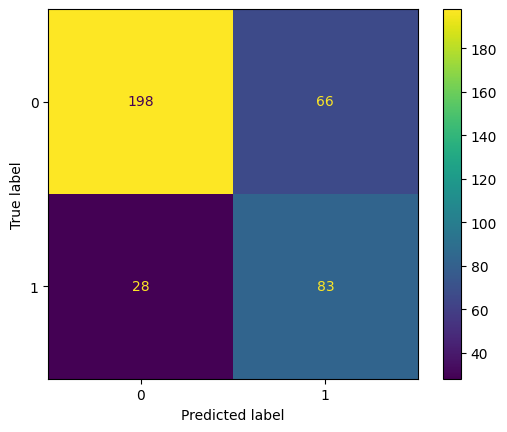

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(gs.best_estimator_, X_test, y_test)
plt.show()

## Obtain performance metrics of model on the held-out test set

In [27]:
clf = gs
print('AUC: %.3f' % (roc_auc_score(y_test, clf.predict(X_test))))
print('MCC: %.3f' % (matthews_corrcoef(y_test, clf.predict(X_test))))
print('Kappa: %.3f' % (cohen_kappa_score(y_test, clf.predict(X_test))))
print('F1: %.3f' % (f1_score(y_test, clf.predict(X_test))))
print('Accuracy: %.3f' % (accuracy_score(y_test, clf.predict(X_test))))
print('Sensitivity: %.3f' % (recall_score(y_test, clf.predict(X_test))))
print('Specificity: %.3f' % (recall_score(y_test, clf.predict(X_test), pos_label=0)))
print('PPV: %.3f' % (precision_score(y_test, clf.predict(X_test))))
print('NPV: %.3f' % (precision_score(y_test, clf.predict(X_test), pos_label=0)))
print('BalancedAcc: %.3f\n\n' % (balanced_accuracy_score(y_test, clf.predict(X_test))))

AUC: 0.749
MCC: 0.464
Kappa: 0.453
F1: 0.638
Accuracy: 0.749
Sensitivity: 0.748
Specificity: 0.750
PPV: 0.557
NPV: 0.876
BalancedAcc: 0.749




## Assess final model calibration

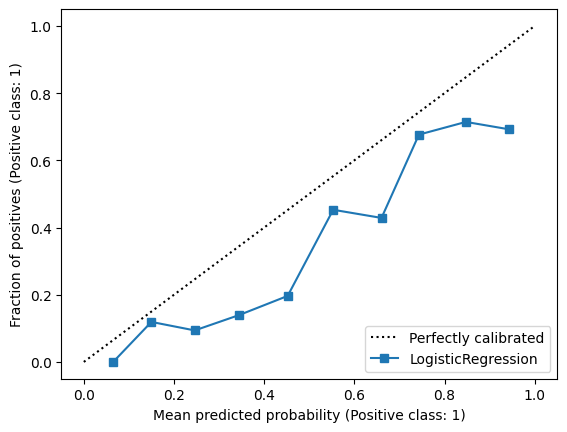

In [28]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=selected_model,
    )

# Perform Classifier Calibration

In [29]:
cal_clf = CalibratedClassifierCV(clf, method="isotonic", cv=5)
cal_clf.fit(X_train, y_train)

/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jose/anaconda

CalibratedClassifierCV(cv=5,
                       estimator=GridSearchCV(cv=5,
                                              estimator=Pipeline(steps=[('standardscaler',
                                                                         StandardScaler()),
                                                                        ('variancethreshold',
                                                                         VarianceThreshold()),
                                                                        ('logisticregression',
                                                                         LogisticRegression(class_weight='balanced',
                                                                                            penalty='elasticnet',
                                                                                            random_state=1,
                                                                                            solver='saga'))]),
                                              n_jobs=-1,
                                              param_grid={'logisticregression__C': [0.0001,
                                                                                    0.001,
                                                                                    0.01,
                                                                                    0.1,
                                                                                    1....
                                                       'F1': 'f1',
                                                       'Kappa': make_scorer(cohen_kappa_score, response_method='predict'),
                                                       'MCC': make_scorer(matthews_corrcoef, response_method='predict'),
                                                       'NPV': make_scorer(precision_score, response_method='predict', pos_label=0),
                                                       'PPV': 'precision',
                                                       'Sensitivity': 'recall',
                                                       'Specificity': make_scorer(recall_score, response_method='predict', pos_label=0)}),
                       method='isotonic')

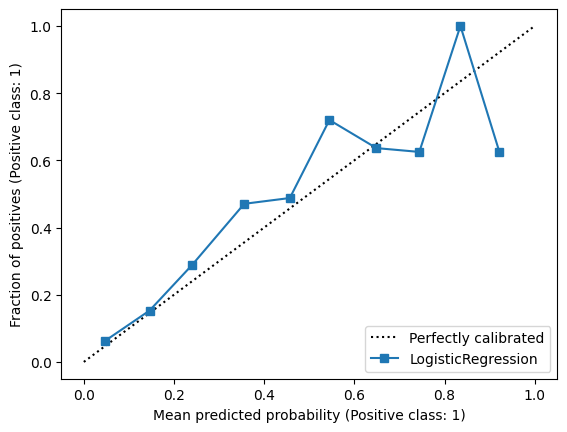

In [30]:
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay
display = CalibrationDisplay.from_estimator(
        cal_clf,
        X_test,
        y_test,
        n_bins=10,
        name=selected_model,
    )

# Shap Analysis for model explainability

In [31]:
from copy import deepcopy

# get preprocessing (normalized and remove near or zero variance features)
best_estimator_preprocessing_pipeline = deepcopy(gs.best_estimator_)
best_estimator_preprocessing_pipeline.steps.pop(2)

# get classifier
model = gs.best_estimator_.steps[2][1]

In [32]:
X_transformed = pd.DataFrame(best_estimator_preprocessing_pipeline.transform(X_train), columns=gs.best_estimator_.steps[1][1].get_feature_names_out())

In [33]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer(X_transformed)
shap.plots.beeswarm(shap_values[:,:,1])

/home/jose/anaconda3/envs/tfg/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


InvalidModelError: Model type not yet supported by TreeExplainer: <class 'sklearn.linear_model._logistic.LogisticRegression'>